In [1]:
%numerics
import sumrules.lib.legacy_analytics as alyt
import sumrules.lib.evaluators as evs
from sumrules.utils import parallel
import sumrules

matplotlib.pyplot loaded as plt
numpy loaded as np
scipy loaded as sp
scipy integrate loaded
scipy special loaded
scipy stats loaded


In [2]:
sumrules.constants["eps"] = 0.001

In [3]:
mp = evs.McolPEvaluator(None, alyt.psiColP)

mp.vectorized = True
mp.mapper = parallel.npMap
mp.absErr = 1e-7

## MP0

In [4]:
mp.MP = alyt.sqedMP0

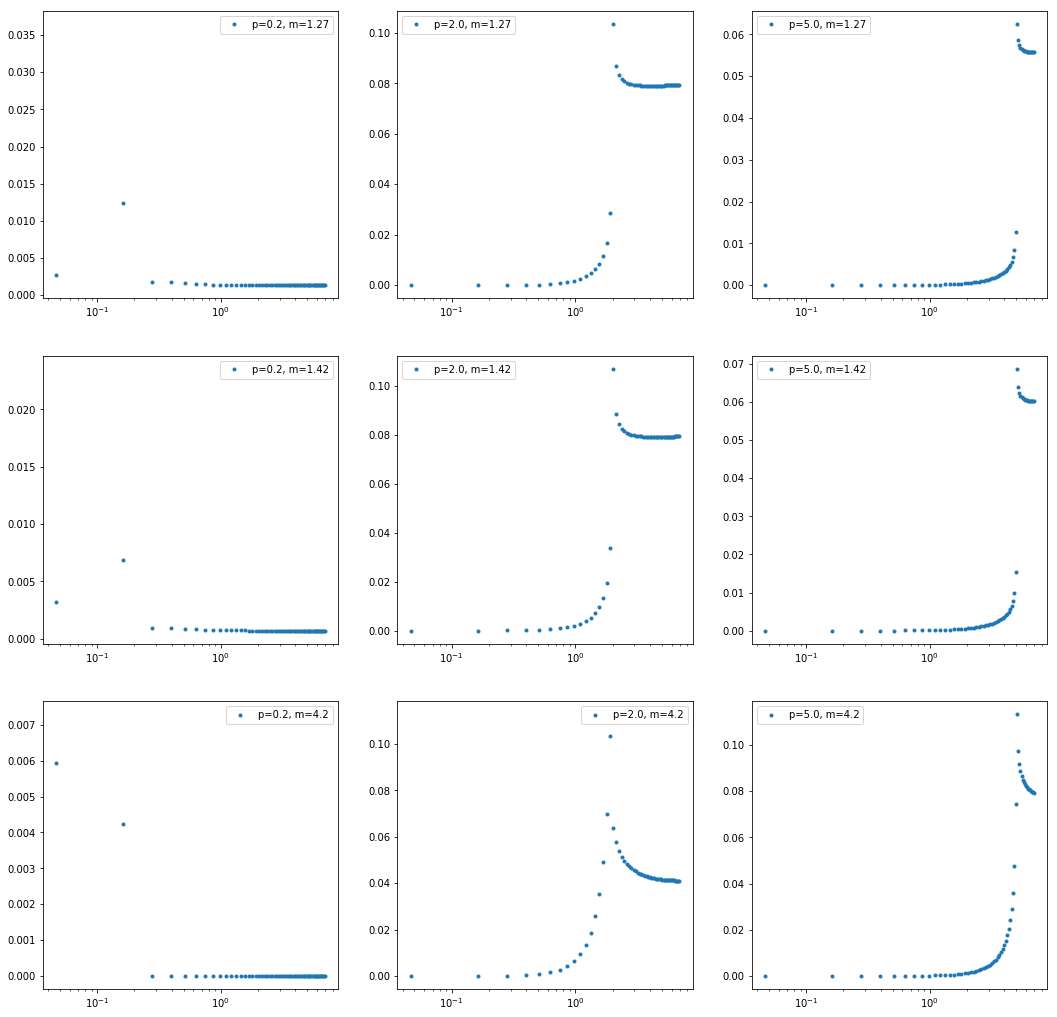

In [5]:
def make(ax, p, m):
    mp.CONST["m"] = m
    points = sp.linspace(sp.log(1e-2), sp.log(1e3), 100)
    vals = sp.empty_like(points, dtype=sp.complex128)
    for i,point in enumerate(points):
        mp.params({"maxP": point})
        vals[i] = mp.compute(p, sp.sqrt(p**2 + mp.CONST["m"]**2), 0.2, 0)
    ax.plot(points, sp.absolute(vals), ".", label="p={0}, m={1}".format(p, m))

fig, ax = plt.subplots(3, 3)
fig.set_size_inches(18, 18)

masses = sp.array([1.27, 1.42, 4.2])
momenta = sp.array([0.2, 2, 5])

for numm, m in enumerate(masses):
    for nump, p in enumerate(momenta):
        make(ax[numm, nump], p, m)

for row in ax:
    for a in row:
        a.set_xscale("log")
        a.legend()

plt.show()

## MP2

In [6]:
mp.MP = alyt.sqedMP2

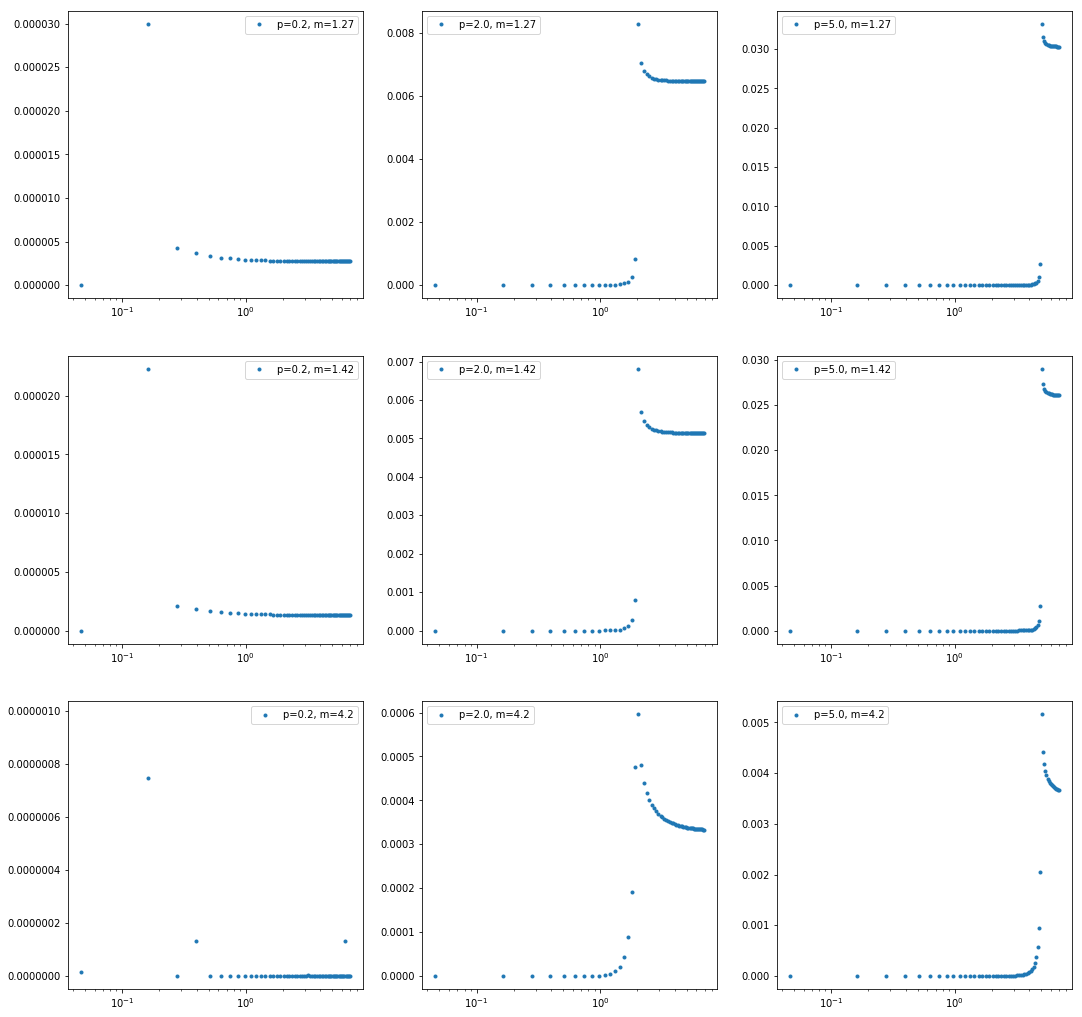

In [7]:
def make(ax, p, m):
    mp.CONST["m"] = m
    points = sp.linspace(sp.log(1e-2), sp.log(1e3), 100)
    vals = sp.empty_like(points, dtype=sp.complex128)
    for i,point in enumerate(points):
        mp.params({"maxP": point})
        vals[i] = mp.compute(p, sp.sqrt(p**2 + mp.CONST["m"]**2), 0.2, 0)
    ax.plot(points, sp.absolute(vals), ".", label="p={0}, m={1}".format(p, m))

fig, ax = plt.subplots(3, 3)
fig.set_size_inches(18, 18)

masses = sp.array([1.27, 1.42, 4.2])
momenta = sp.array([0.2, 2, 5])

for numm, m in enumerate(masses):
    for nump, p in enumerate(momenta):
        make(ax[numm, nump], p, m)

for row in ax:
    for a in row:
        a.set_xscale("log")
        a.legend()

plt.show()